In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("heart.csv")
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [8]:
print(f"Total of {data.output.sum()} people diagnosed positive for potential heart attack and {len(data)-data.output.sum()} diagnosed -ve, out of {len(data)} patients")

for i in ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']:
    print(i, "  ", data[i].unique())


Total of 165 people diagnosed positive for potential heart attack and 138 diagnosed -ve, out of 303 patients
sex    [1 0]
cp    [3 2 1 0]
fbs    [1 0]
restecg    [0 1 2]
exng    [0 1]
slp    [0 2 1]
caa    [0 2 1 3 4]
thall    [1 2 3 0]
output    [1 0]


In [3]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isna().sum().sum() # checking for missing values

0

In [15]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(data.drop("output", axis =1), data.output, test_size=0.25, random_state=42)
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [11]:
lst = ['cp', 'restecg']

for i in lst:
    for j in X_train[i].unique():
        
        dummie = X_train[i] == j
        X_train[i + "_" + str(j)] = dummie * 1
        
        dummie = X_test[i] == j
        X_test[i + "_" + str(j)] = dummie * 1
        
X_train = X_train.drop(lst, axis = 1)
X_test = X_test.drop(lst, axis = 1)

#### we can remove restecg_0, and cp_0 because they act as duplicates 

In [12]:
column_list = ['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
                   'slp', 'caa', 'thall', 'cp_1', 'cp_2', 'cp_3','restecg_1', 'restecg_2'] # for rearranging the columns

X_train = X_train[column_list]
X_test = X_test[column_list]

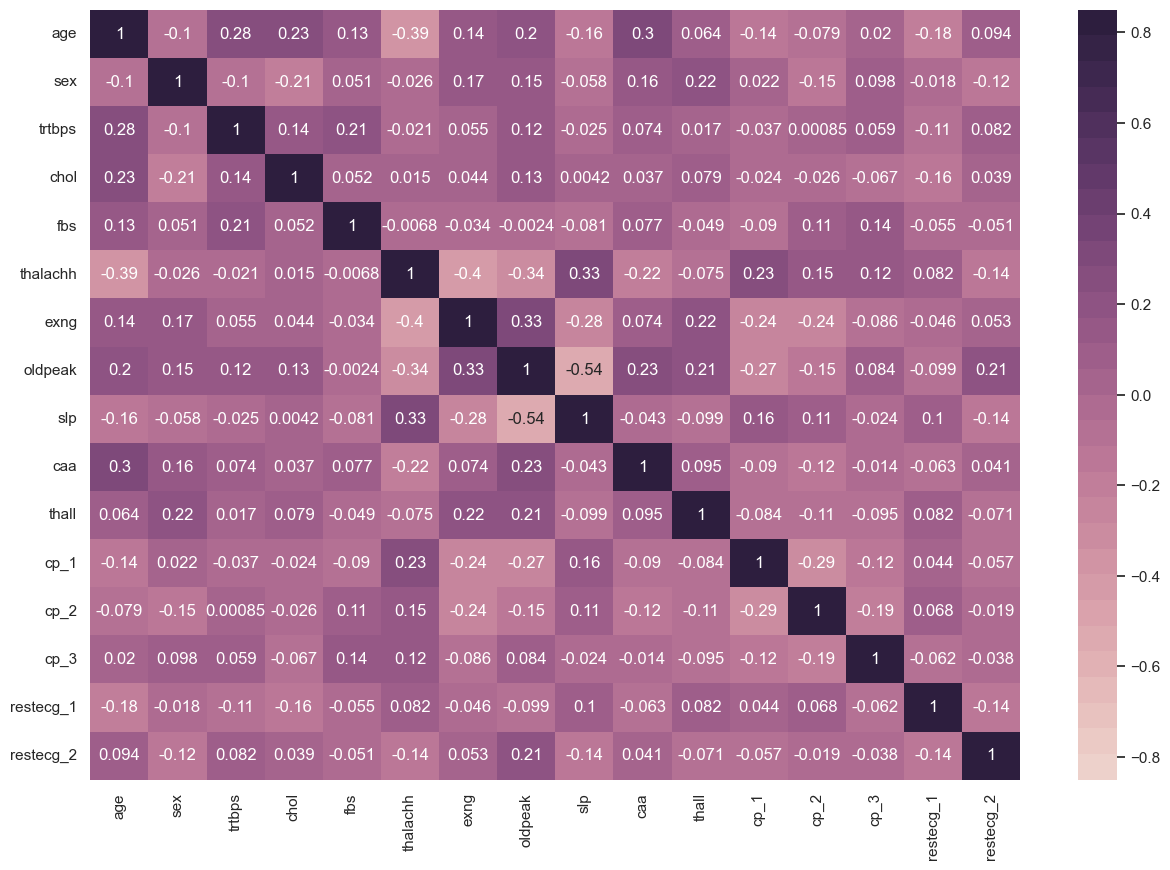

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(), cmap = sns.cubehelix_palette(30), annot = True, vmin=-0.85, vmax=0.85)
plt.savefig('images/before.png')

#### All good not much of considerable inter dependency

In [16]:
df = X_train.iloc[:,[0,2,3,5,7]]
df.loc[:,"output"] = y_train
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20276\1691760929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"output"] = y_train


,age,cp,trtbps,fbs,thalachh,output
287,57,1,154,0,164,0
282,59,2,126,1,134,0
197,67,0,125,1,163,0
158,58,1,125,0,144,1
164,38,2,138,0,173,1


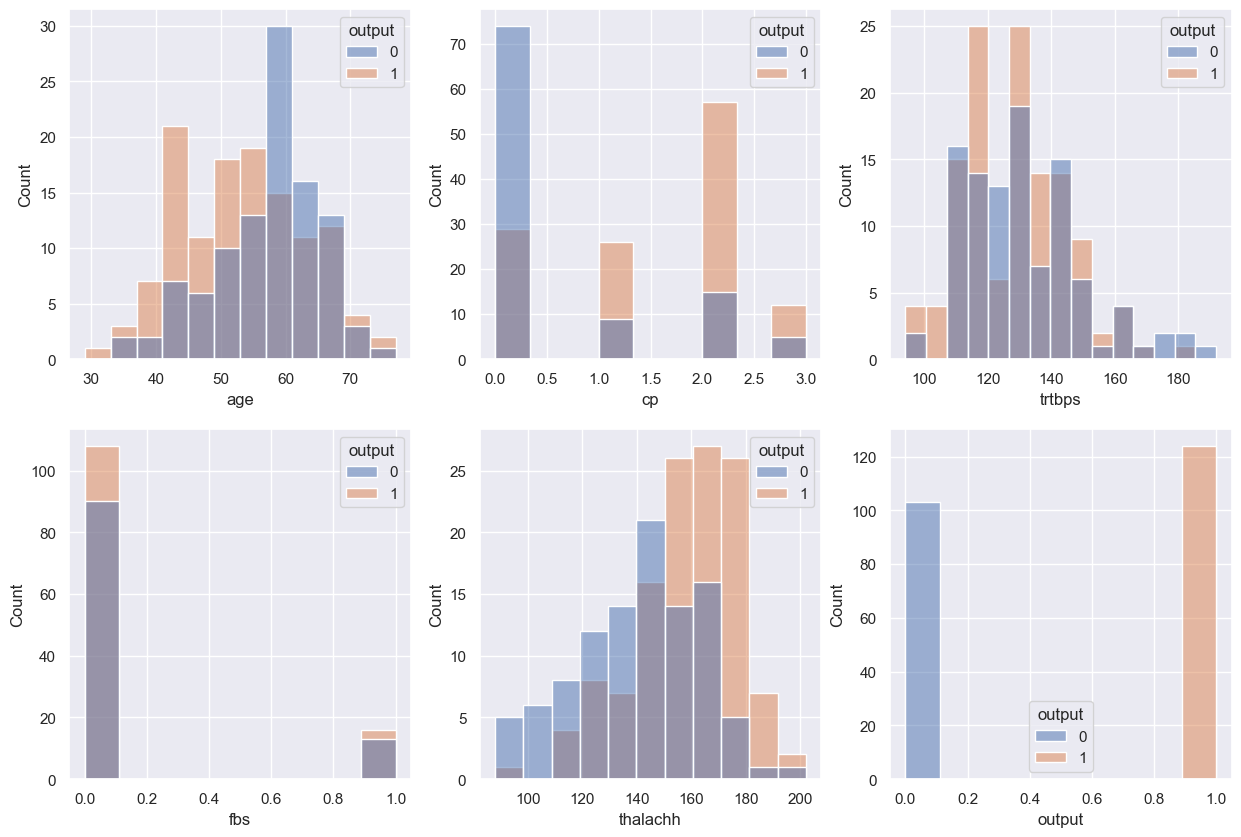

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
a = 0
for i in range(2):
    for j in range(3):
        sns.histplot(df, x=df.columns[a], element = "bars", ax = ax[i,j], hue = "output" )
        a = a+1
        
plt.savefig('images/histplot.png')

C:\Users\User\AppData\Local\Temp\ipykernel_20276\4117581130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"output"] = y_train


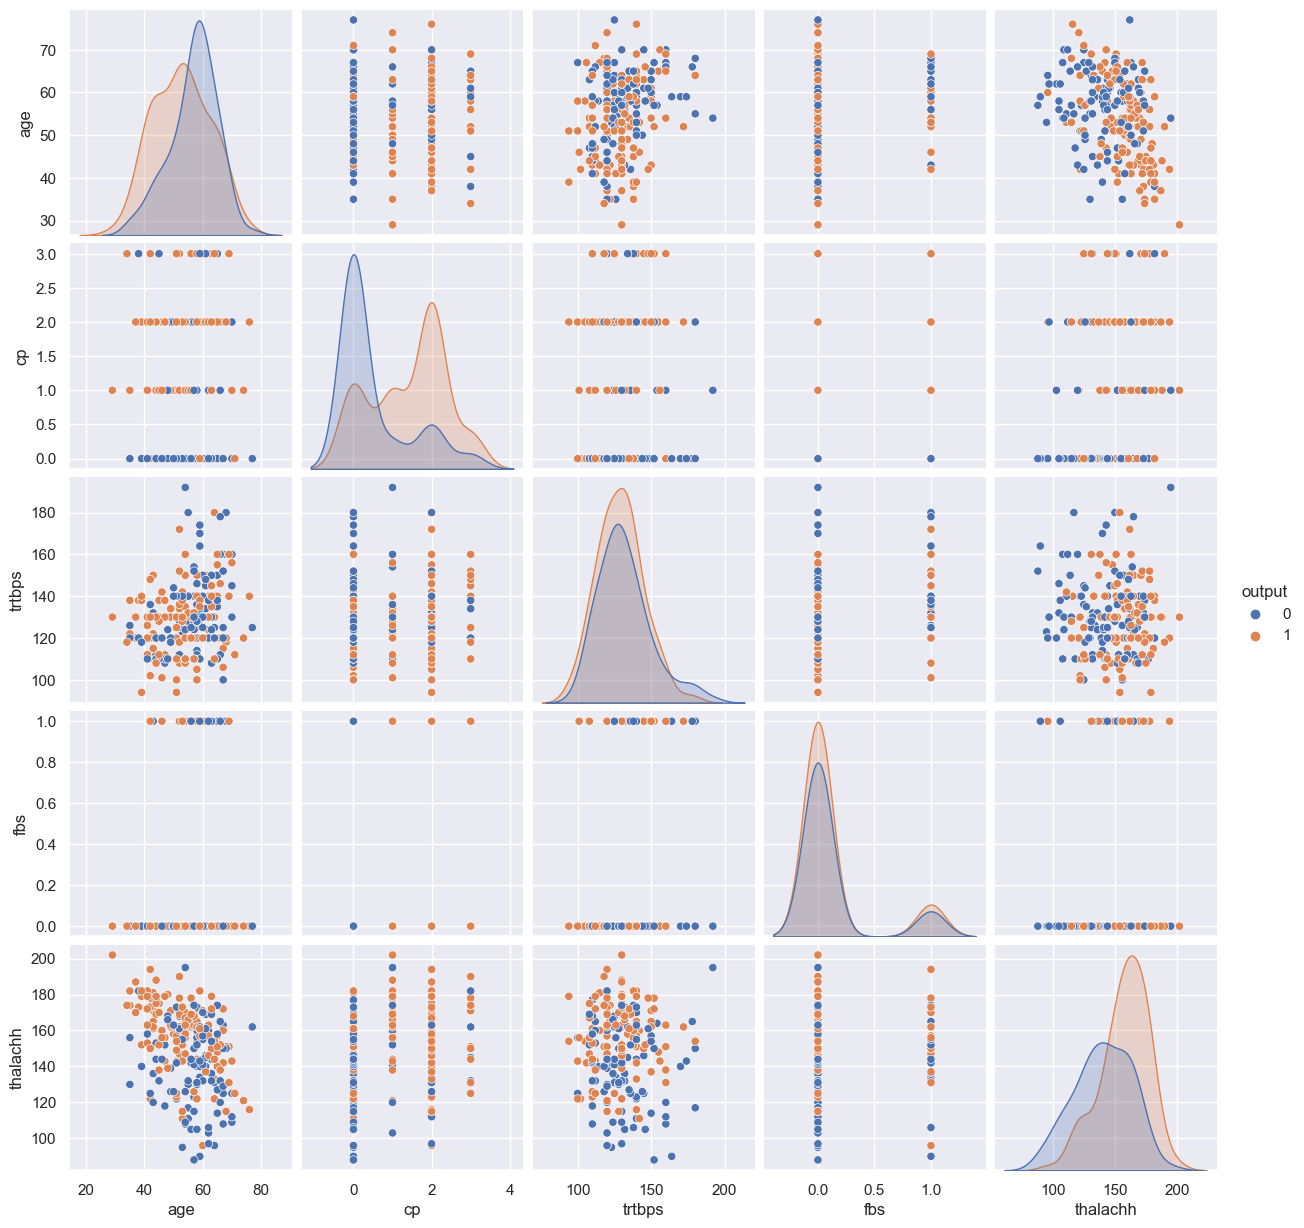

In [18]:
df = X_train.iloc[:,[0,2,3,5,7]]
df.loc[:,"output"] = y_train
sns.pairplot(df, hue="output")
plt.savefig('images/pairplot.png')

#### We can observe some cluster formation in the avove pair plot. So we can expect high accuracy of classification for this problem